In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in STOR 120


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_scatter(r):
    """Generate a scatter plot with a correlation approximately r"""
    plots.figure(figsize=(5,5))
    x, y = make_correlated_data(r)
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    
def r_table(r):
    """
    Generate a table of 1000 data points with a correlation approximately r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

## Functions from Last Class

In [3]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

## Correlation ##

In [4]:
HighPeaks = Table.read_table('../Datasets/HighPeaks.csv')
HighPeaks

Peak,Elevation,Difficulty,Ascent,Length,Time
Mt. Marcy,5344,5,3166,14.8,10
Algonquin Peak,5114,5,2936,9.6,9
Mt. Haystack,4960,7,3570,17.8,12
Mt. Skylight,4926,7,4265,17.9,15
Whiteface Mtn.,4867,4,2535,10.4,8.5
Dix Mtn.,4857,5,2800,13.2,10
Gray Peak,4840,7,4178,16,14
Iroquois Peak,4840,6,3250,11.6,8.5
Basin Mtn.,4827,6,3650,16.5,11
Gothics,4736,5,4070,10,9


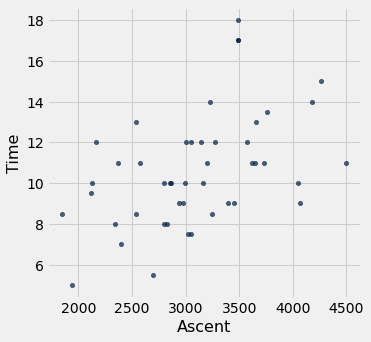

In [5]:
HighPeaks.scatter('Ascent', 'Time')

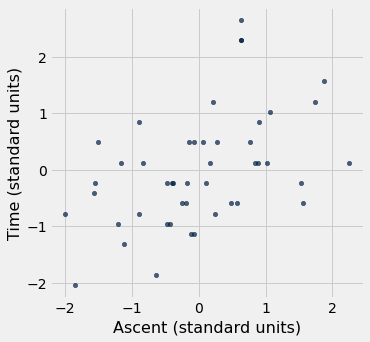

In [6]:
HighPeaks_AT = HighPeaks.select('Ascent', 'Time')

HighPeaks_AT = HighPeaks_AT.with_columns(
    'Ascent (standard units)',  standard_units(HighPeaks.column('Ascent')), 
    'Time (standard units)', standard_units(HighPeaks.column('Time'))
)

HighPeaks_AT.scatter('Ascent (standard units)', 'Time (standard units)')

In [7]:
correlation(HighPeaks, 'Ascent', 'Time')

0.4688752902139177

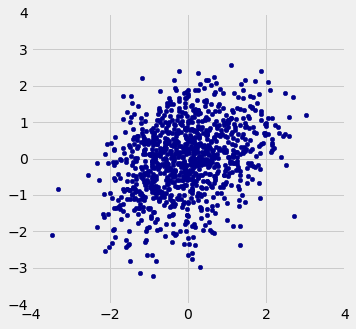

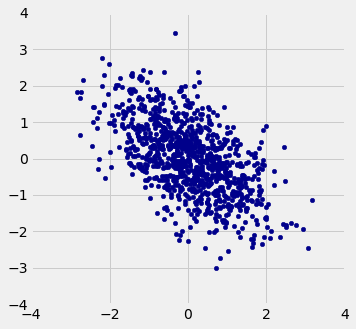

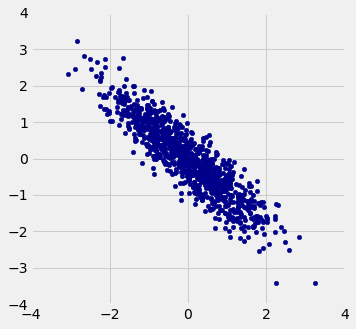

In [8]:
r_scatter(0.3), r_scatter(-0.6), r_scatter(-.9);

## Prediction lines

In [9]:
example = r_table(-0.9)
example.show(3)

x,y
0.0912047,-0.571236
1.09128,-1.09483
-1.94697,1.88928


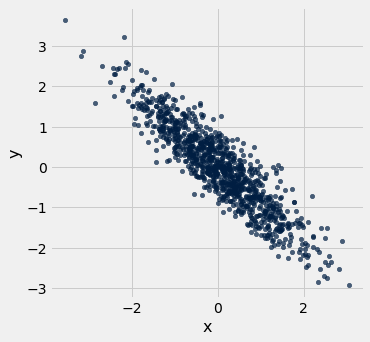

In [10]:
example.scatter('x', 'y')

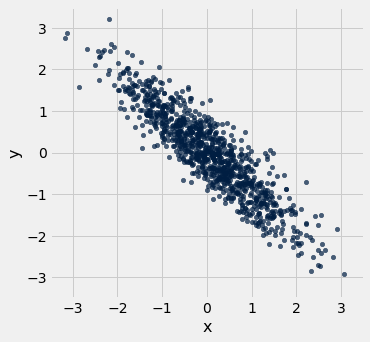

In [11]:
example.scatter('x', 'y')
resize_window()

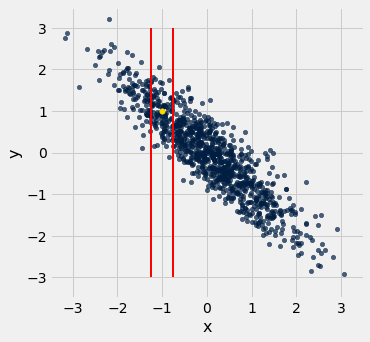

In [12]:
example.scatter('x', 'y')
plots.plot([-1.25, -1.25], [-3, 3], color='red', lw=2)
plots.plot([-0.75, -0.75], [-3, 3], color='red', lw=2)
plots.scatter(-1,1, s=30, color='gold')
resize_window()

In [13]:
def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
    return np.mean(neighbors.column('y'))
    

In [14]:
nn_prediction_example(-2.25)

2.303319612972712

In [15]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

example

x,y,Predicted y
0.0912047,-0.571236,-0.0340624
1.09128,-1.09483,-0.989771
-1.94697,1.88928,1.78727
-1.38635,1.32725,1.20159
-2.29649,2.4506,2.28908
2.40983,-1.5183,-2.06595
1.72784,-1.39953,-1.48872
2.20456,-0.714786,-1.9471
0.794828,-0.742013,-0.678926
0.976421,-0.215279,-0.881975


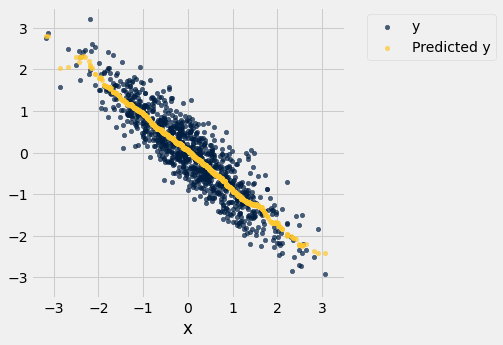

In [16]:
example.scatter('x')
resize_window()

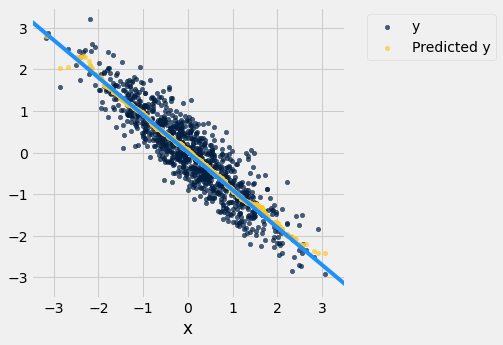

In [17]:
example.scatter('x')
draw_line(slope=-.9, color='dodgerblue')
resize_window()

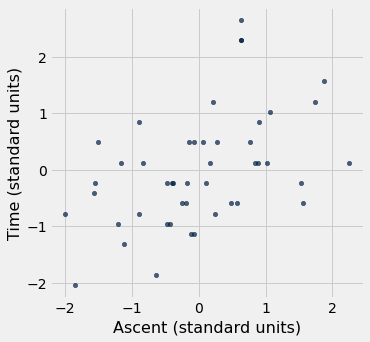

In [18]:
HighPeaks_AT.scatter('Ascent (standard units)', 'Time (standard units)')

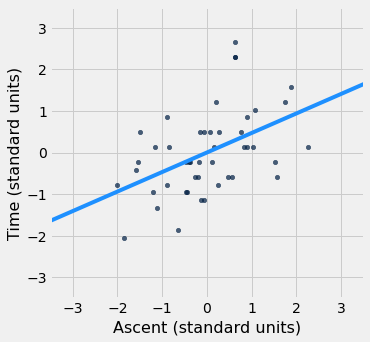

In [19]:
HighPeaks_AT.scatter('Ascent (standard units)', 'Time (standard units)')

draw_line(slope = correlation(HighPeaks, 'Ascent', 'Time'), color='dodgerblue')
resize_window()

## Linear regression: defining the line

In [20]:
def slope(t, x, y):
    """t is a table; x and y are column labels"""
    r = correlation(t, x, y)
    slope_xy = r * np.std(t.column(y)) / np.std(t.column(x))
    return slope_xy

In [21]:
def intercept(t, x, y):
    """t is a table; x and y are column labels"""
    slope_xy = slope(t, x, y)
    intercept_xy = np.average(t.column(y) - slope_xy * np.average(t.column(x)))
    return intercept_xy

In [22]:
slope(HighPeaks, 'Ascent', 'Time')

0.002080525080839209

In [23]:
intercept(HighPeaks, 'Ascent', 'Time')

4.210054144255395

In [24]:
Time_predict = slope(HighPeaks, 'Ascent', 'Time') * 3000 + intercept(HighPeaks, 'Ascent', 'Time')

print('It will take', np.round(Time_predict, 2), 'hours to climb a mountain with an ascent of 3000 ft')

It will take 10.45 hours to climb a mountain with an ascent of 3000 ft


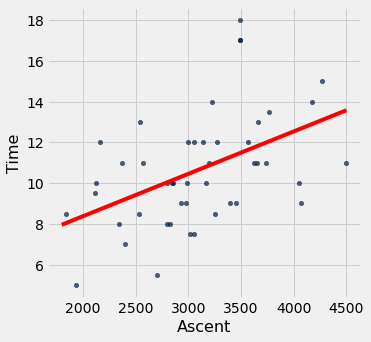

In [25]:
HighPeaks.scatter('Ascent', 'Time')
draw_line(
    slope = slope(HighPeaks, 'Ascent', 'Time'), 
    intercept = intercept(HighPeaks, 'Ascent', 'Time'), 
    x = make_array(1800, 4500), 
    color='r'
)

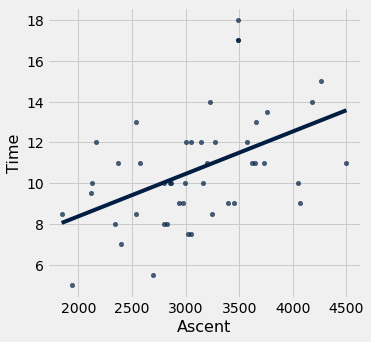

In [26]:
HighPeaks.scatter('Ascent', 'Time', fit_line=True)